In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv("D:\\college\\ML pratical\\EX-02\\house_price.csv")

In [3]:
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [4]:
sqft=data['sqft_living']
cost=data['price']
sqft
cost

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [5]:
X=np.array(sqft).reshape(-1,1)
y=np.array(cost).reshape(-1,1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:",math.floor(rmse))
print("Mean Absolute Error:",math.floor(mae))

Root Mean Squared Error: 276559
Mean Absolute Error: 177867


In [10]:
pred = model.predict([[1180]])
predicted_price=int(pred)
print(f"Predicted Price for the given sqft:$",predicted_price)

Predicted Price for the given sqft:$ 287875


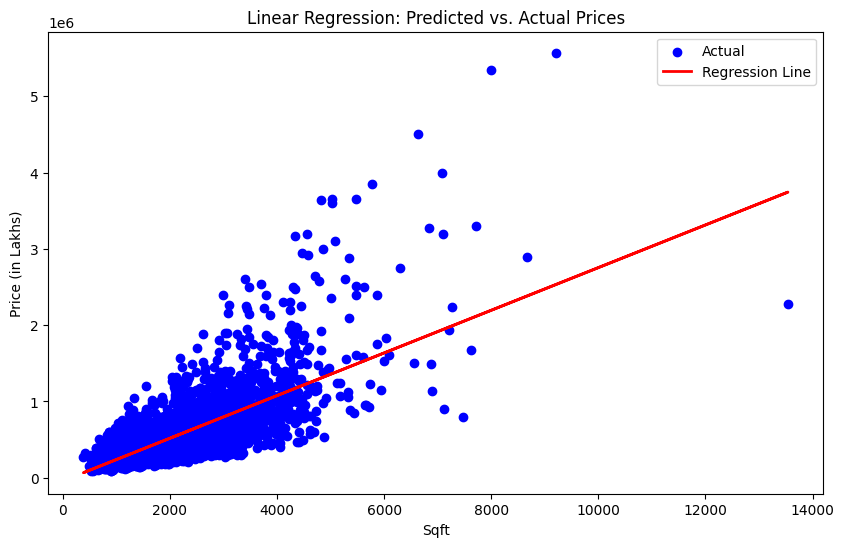

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Sqft')
plt.ylabel('Price (in Lakhs)')
plt.title('Linear Regression: Predicted vs. Actual Prices')
plt.legend()
plt.show()